In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

### Check if the timestamps are the same for each CSV file of every channel

In [46]:
for channel_number in range(8):
    file_paths = glob.glob(f"*_{channel_number}_*.csv")
    times = []
    for file in file_paths:
        df = pd.read_csv(file, skiprows=3, delimiter=";")
        df.columns = ["time", "current"]
        times.append(df["time"].tolist())
    
    first_list = times[0]
    print(all(lst == first_list for lst in times))

True
True
True
True
True
True
True
True


### Descriptive statistics of the dataframe

Noise analysis was performed via descriptive statistics of only the first dataframe for each channel. <br>
These statistics for the current values in each channel indicate that the sensor readings are consistent and stable across different channels. <br>
The mean current values are very close to zero, aligning with the expected near-zero behavior of current transients. <br>
The low standard deviation values (~0.000045 to 0.000046) suggest minimal variability, pointing to good sensor precision. <br>
The small range of current values (approximately -0.000679 to 0.005828) indicates the presence of some outliers or spikes. <br>
The interquartile range (IQR) is also small, meaning most data points are close to the median value (-0.000031 to -0.000027). <br>
Overall, the data demonstrates stability, low noise, and minimal variability across the channels.

In [47]:
for channel_number in range(8):
    file_paths = glob.glob(f"*_{channel_number}_*.csv")
    df = pd.read_csv(file_paths[0], skiprows=3, delimiter=";")
    print(df.describe())

                  0   0.00622878104231117
count  25000.000000          25000.000000
mean       5.000200             -0.000031
std        2.886809              0.000046
min        0.000400             -0.000679
25%        2.500300             -0.000037
50%        5.000200             -0.000031
75%        7.500100             -0.000025
max       10.000000              0.005828
                  0   0.00622878104231117
count  25000.000000          25000.000000
mean       5.000200             -0.000028
std        2.886809              0.000045
min        0.000400             -0.000470
25%        2.500300             -0.000034
50%        5.000200             -0.000028
75%        7.500100             -0.000022
max       10.000000              0.005747
                  0   0.00622878104231117
count  25000.000000          25000.000000
mean       5.000200             -0.000028
std        2.886809              0.000045
min        0.000400             -0.000455
25%        2.500300             -0

### Preprocessing

In [48]:
def preprocess_channel_data(file_paths):
    all_data = []
    for file in file_paths:
        df = pd.read_csv(file, skiprows=3, delimiter=";")
        df.columns = ["time", "current"]
        all_data.append(df)
    combined_data = pd.concat(all_data)
    mean_data = combined_data.groupby('time').mean().reset_index()
    return mean_data

### Visualization

In [49]:
def plot_channel_data():
    plt.figure(figsize=(14, 10))
    for channel_number in range(8):
        file_paths = glob.glob(f"*_{channel_number}_*.csv")
        channel_data = preprocess_channel_data(file_paths)
        current = channel_data["current"]
        
        plt.subplot(4, 2, channel_number + 1)
        plt.plot(channel_data["time"], current, color='black', linewidth=0.8)
        plt.title(f'Channel {channel_number}')
        plt.xlabel('t / s')
        plt.ylabel('I / pA')
        plt.ylim(current.min(), -current.min())
        plt.tight_layout()
    plt.show()

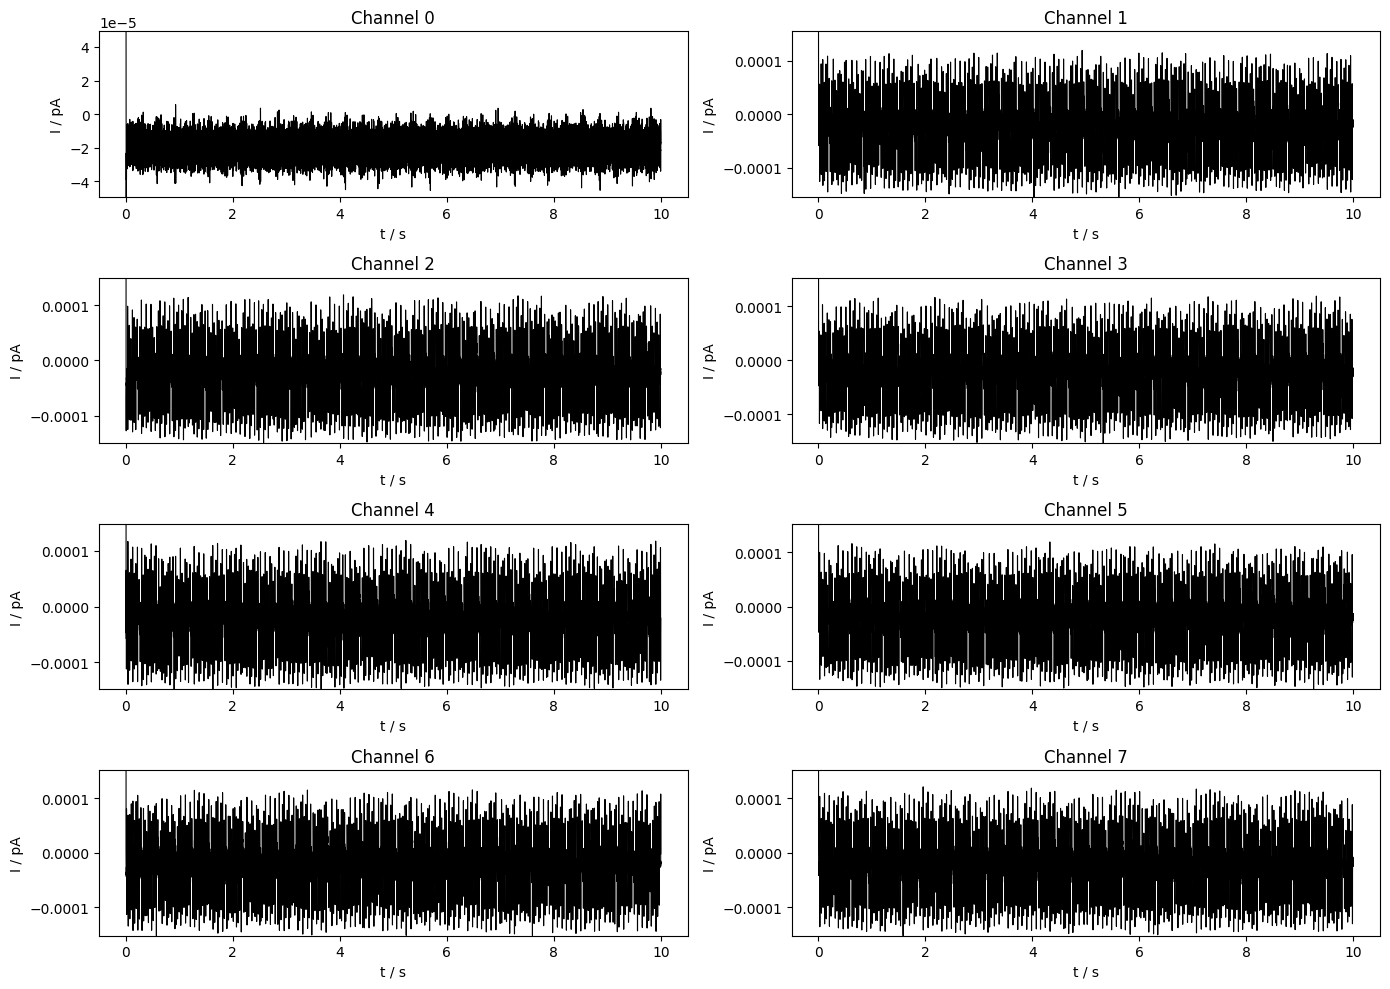

In [50]:
plot_channel_data()

### Identificaiton and Visualization of corrupted channels

In [51]:
from scipy.stats import zscore

def identify_corrupted_channels(channel_data, threshold=3):
    z_scores = zscore(channel_data["current"])
    corrupted = abs(z_scores) > threshold
    corrupted_data = channel_data[corrupted]
    return corrupted_data

In [60]:
def analyze_channels():
    plt.figure(figsize=(14, 10))
    for channel_number in range(8):
        file_paths = glob.glob(f"*_{channel_number}.csv")
        channel_data = preprocess_channel_data(file_paths)
        current = channel_data["current"]
        corrupted_data = identify_corrupted_channels(channel_data)

        if not corrupted_data.empty:
            plt.subplot(4, 2, channel_number + 1)
            plt.plot(channel_data["time"], current, color='black', linewidth=0.8, label='Normal Data')
            plt.plot(corrupted_data["time"], corrupted_data["current"], 'ro', markersize=2, label='Corrupted Data')
            plt.title(f'Channel {channel_number} with corrupted data')
            plt.xlabel('t / s')
            plt.ylabel('I / pA')
            plt.ylim(current.min(), current.mean() + current.std() / 2)
            plt.tight_layout()
    plt.show()

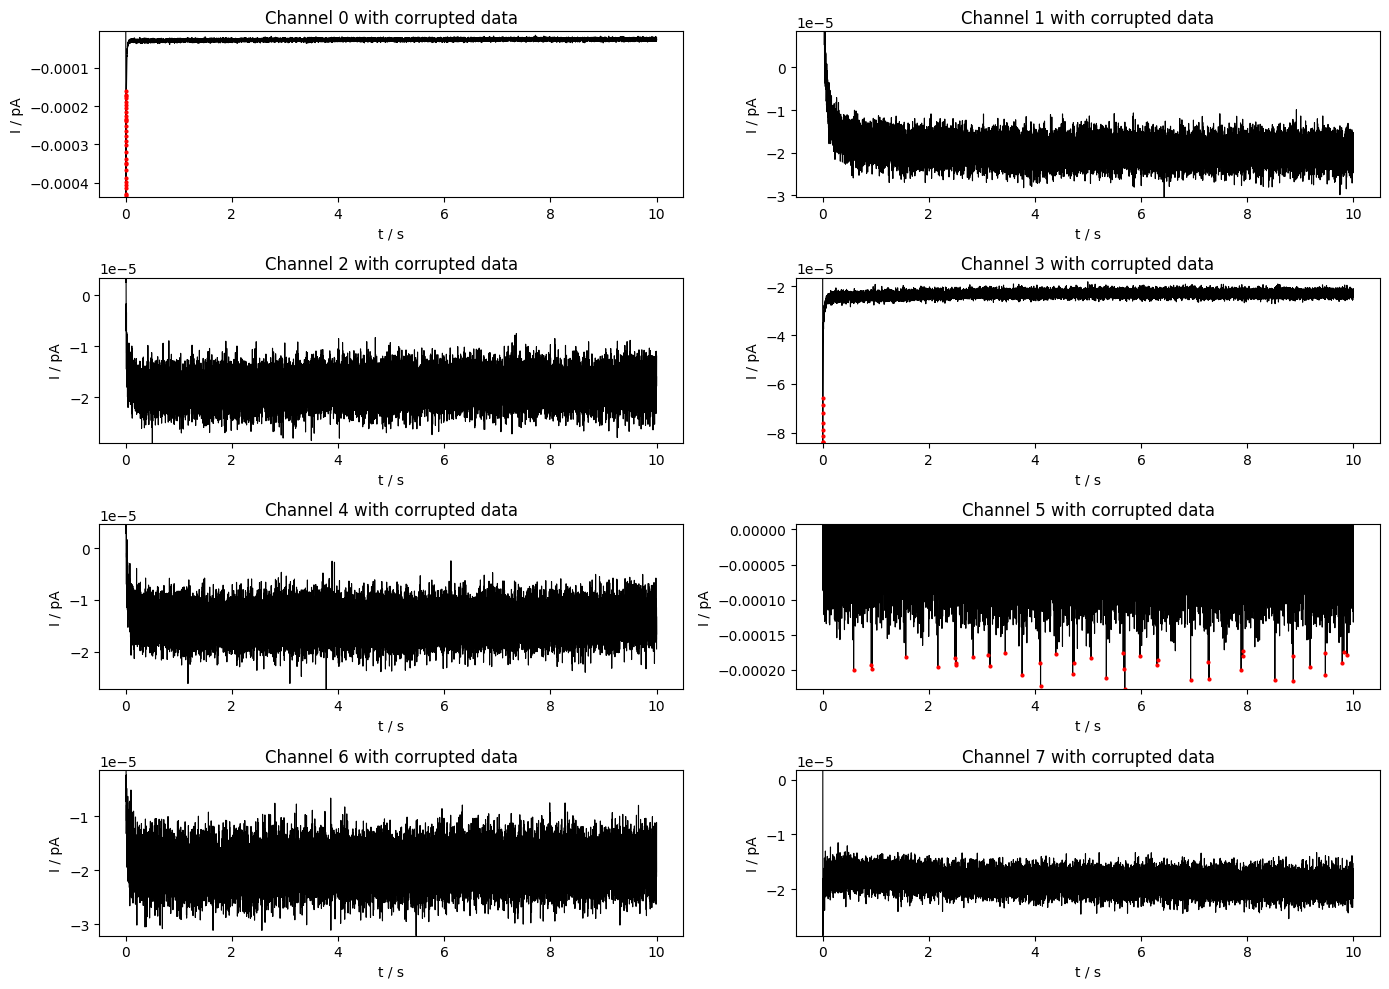

In [61]:
analyze_channels()